___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg" width="350px" height="180px" />


# <font color= #8A0829> Data modelling lab </font>
- <Strong> Teacher: Sara Eugenia Rodríguez </Strong>
- <Strong> Year </Strong>: 2023

___

<p style="text-align:right;"> Image from: https://bernardmarr.com/img/What%20is%20an%20Artificial%20Neural%20Networks.jpg</p>

### <font color= #2E9AFE> Topic: Neural nets for classification</font>


- Output fot this models are discrete values, generally (0,2)
- Output layer shouldn't be linear. Sigmoidal function is recommended
- Cost function is cross Entropy
- If output is multiclass, output layer will be Softmax



**Binary output example**

Predicting if a person will have diabetes or not

In [1]:
#Libraries
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense
import numpy as np
from sklearn.model_selection import train_test_split

2023-11-13 16:01:00.637649: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 16:01:00.678470: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-13 16:01:00.678510: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-13 16:01:00.678546: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-13 16:01:00.686114: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-13 16:01:00.686610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
data = pd.read_csv(r'diabetes.csv')

In [3]:
desc = data.describe()
info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#Tran-test split
X = data.iloc[:,0:8]
Y = np.ravel(data['Outcome'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
#Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [7]:
#Build neural network
from keras.models import Sequential
from keras.layers import Dense

# Net 
model = Sequential()
model.add(Dense(8, activation='tanh', input_shape=(8,))) #Activation function could be changed
model.add(Dense(1, activation='sigmoid')) #Output layer should be sigmoid for binary problems (0,1)

# Optimizer setup
model.compile(loss='binary_crossentropy',#Cost function
              optimizer='sgd',
              metrics=['accuracy'])

# Net training
model_history=model.fit(X_train, Y_train,epochs=200, batch_size=100, verbose=1)

Epoch 1/200


2023-11-13 16:01:02.684995: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-13 16:01:02.685565: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


6/6 [==============================] - 0s 2ms/step - loss: 0.8619 - accuracy: 0.4953
Epoch 2/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8399 - accuracy: 0.5047
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 0.8197 - accuracy: 0.5102
Epoch 4/200
6/6 [==============================] - 0s 1ms/step - loss: 0.8008 - accuracy: 0.5158
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7824 - accuracy: 0.5251
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7657 - accuracy: 0.5363
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 0.5531
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5642
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 0.7216 - accuracy: 0.5810
Epoch 10/200
6/6 [==============================] - 0s 1ms/step - loss: 0.7088 - accuracy: 0.5866
Epoch 11/200
6/6 [=======================

(Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy function'))

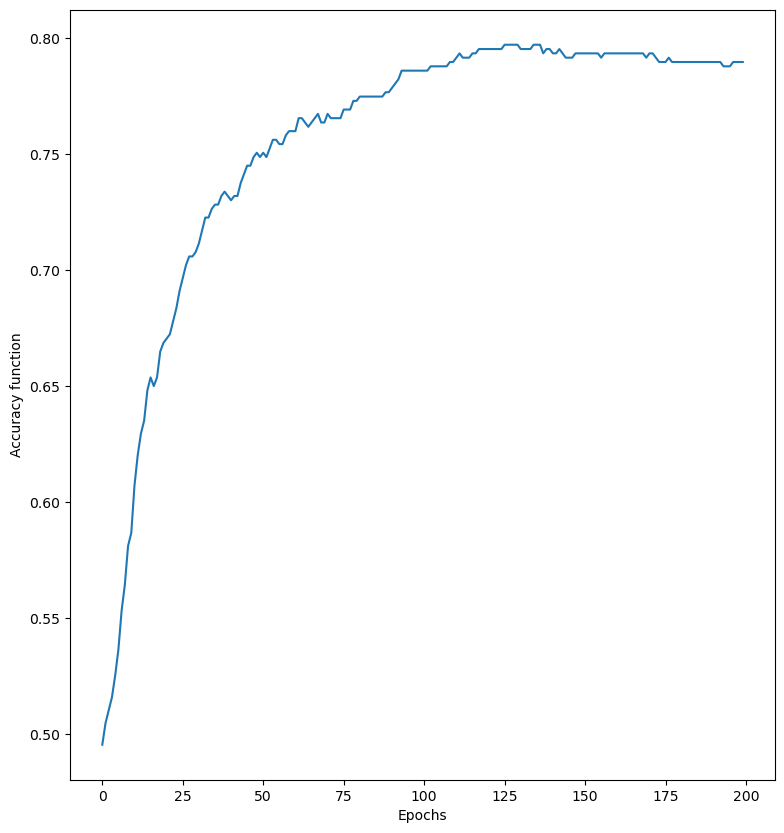

In [8]:
#Check accuracy
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,10))
plt.subplot(122)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epochs'),plt.ylabel('Accuracy function')


In [9]:
#Use model to predict probability and class
Y_pred = model.predict(X_test) #Probability terms
Y_prob = (model.predict(X_test) > 0.5).astype("int32") #Class terms


8/8 [==============================] - 0s 719us/step


In [10]:
[v[0] for v in Y_pred]

[0.2990869,
 0.14362507,
 0.10002363,
 0.25218835,
 0.45512176,
 0.5061323,
 0.02149595,
 0.52437514,
 0.60790175,
 0.74970937,
 0.31098658,
 0.7936848,
 0.38009787,
 0.38992754,
 0.080849074,
 0.4153622,
 0.07934461,
 0.05647682,
 0.8224243,
 0.56791884,
 0.22814937,
 0.04742162,
 0.55504584,
 0.06338312,
 0.5769915,
 0.8701375,
 0.10683671,
 0.026147889,
 0.21666281,
 0.12222147,
 0.7039009,
 0.87954056,
 0.7505078,
 0.7831922,
 0.6600161,
 0.81616545,
 0.8512724,
 0.2526645,
 0.37570584,
 0.6596836,
 0.043281972,
 0.5884135,
 0.5058246,
 0.34947705,
 0.1173267,
 0.6204223,
 0.72564447,
 0.18572628,
 0.35721877,
 0.9220247,
 0.037150625,
 0.6306339,
 0.7318229,
 0.27574384,
 0.08984342,
 0.03054268,
 0.74659914,
 0.0205647,
 0.47935688,
 0.8227753,
 0.7916938,
 0.31275505,
 0.35737172,
 0.50051224,
 0.056063265,
 0.45449278,
 0.032868594,
 0.8553011,
 0.060118597,
 0.7068882,
 0.75313073,
 0.09313937,
 0.20445895,
 0.08091877,
 0.11177979,
 0.325498,
 0.2231738,
 0.101241924,
 0.1319

In [11]:
[v[0] for v in Y_prob]

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0]

In [12]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score) #The bigger the better

#Train metrics
accu_train = accuracy_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
prec_train = precision_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))
reca_train = recall_score(Y_train,(model.predict(X_train) > 0.5).astype("int32"))

#Test metrics
accu_test = accuracy_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
prec_test = precision_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))
reca_test = recall_score(Y_test,(model.predict(X_test) > 0.5).astype("int32"))

print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

8/8 [==============================] - 0s 911us/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.790 	 0.733 	 0.628
  Test 	 0.753 	 0.639 	 0.662


**Multiclass example**

- Even tho outputs of neural nets are limited between 0 and 1, it's not guaranteed that the sum is 1
- Transform outputs so they can be used as probabilities cound help interpretability
- Softmax transformation

$$\hat{p}_{l,i}^{*} = \frac{e^{\hat{y}_{l,i}}}{\sum{e^{\hat{y}_{l,i}}}}$$

- $\hat{y}_{1}=0.25$, $\hat{y}_{2}=0.76$, $\hat{y}_{3}=0.1$

- $\hat{p}_{1}=0.3099$, $\hat{p}_{2}=0.4717$, $\hat{p}_{3}=0.2184$

In [13]:
#Libraries
import pandas as pd
from sklearn import datasets
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier
#from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD, Adam
#from tensorflow.keras.optimizers import SGD

In [14]:
#Data
iris = datasets.load_iris()
X = iris.data
Y = iris.target #Tree flower types


In [15]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [16]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [17]:
#cChange output variable(y) so it can be used in the net
dummy_y = to_categorical(Y).astype(int)

In [18]:
dummy_y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [19]:
#Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y,
                                                    test_size=0.2, random_state=42)

In [20]:
#Net 

# neural network structure
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(4,)))
model.add(Dense(3, activation='softmax'))#output

#Gradient descendent
learning_rate=0.1
epochs = 200
momentum = 0.8
sgd = SGD(learning_rate=learning_rate, momentum=momentum)

# Optmizer
model.compile(loss='categorical_crossentropy',#cost
              optimizer=sgd,
              metrics=['accuracy'])



history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))


Epoch 1/200
2/2 [==============================] - 0s 131ms/step - loss: 1.5884 - accuracy: 0.3667 - val_loss: 1.2543 - val_accuracy: 0.6333
Epoch 2/200
2/2 [==============================] - 0s 21ms/step - loss: 1.1396 - accuracy: 0.6000 - val_loss: 0.7539 - val_accuracy: 0.6000
Epoch 3/200
2/2 [==============================] - 0s 18ms/step - loss: 0.7402 - accuracy: 0.7167 - val_loss: 0.7290 - val_accuracy: 0.7000
Epoch 4/200
2/2 [==============================] - 0s 19ms/step - loss: 0.7100 - accuracy: 0.6583 - val_loss: 0.5682 - val_accuracy: 0.8333
Epoch 5/200
2/2 [==============================] - 0s 20ms/step - loss: 0.5406 - accuracy: 0.7917 - val_loss: 0.4720 - val_accuracy: 0.9000
Epoch 6/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4701 - accuracy: 0.8833 - val_loss: 0.4240 - val_accuracy: 0.8333
Epoch 7/200
2/2 [==============================] - 0s 19ms/step - loss: 0.4324 - accuracy: 0.8083 - val_loss: 0.3740 - val_accuracy: 0.8333
Epoch 8/200
2/2 [==

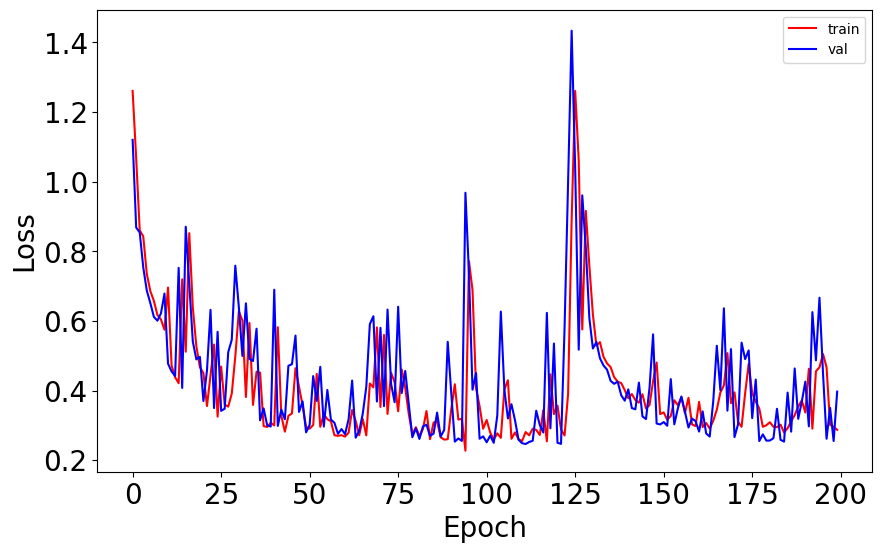

In [21]:
#Plot chart
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [22]:
#Predict with model
Y_pred = model.predict(X_test)
Y_prob = (model.predict(X_test) > 0.5).astype("int32")

1/1 [==============================] - 0s 13ms/step


In [23]:
Y_pred

array([[1.37773901e-03, 9.68983889e-01, 2.96383724e-02],
       [9.99998510e-01, 1.39550855e-06, 5.73031567e-10],
       [7.57649325e-12, 1.01247177e-04, 9.99898732e-01],
       [1.08385633e-03, 9.68984187e-01, 2.99319420e-02],
       [3.99111275e-04, 9.68433380e-01, 3.11675053e-02],
       [9.99993742e-01, 6.16786883e-06, 3.78411213e-09],
       [9.25466511e-03, 9.63499129e-01, 2.72461921e-02],
       [1.67328781e-05, 5.80009043e-01, 4.19974267e-01],
       [7.41421463e-05, 8.93173575e-01, 1.06752425e-01],
       [3.74482782e-03, 9.67844248e-01, 2.84107160e-02],
       [9.57160664e-05, 6.86031461e-01, 3.13872755e-01],
       [9.99991357e-01, 8.55051985e-06, 5.72994896e-09],
       [9.99999702e-01, 2.28040079e-07, 5.73972640e-11],
       [9.99990523e-01, 9.39819347e-06, 6.46090648e-09],
       [9.99998868e-01, 1.04654748e-06, 3.97592015e-10],
       [1.81777508e-03, 9.68882561e-01, 2.92996168e-02],
       [4.37337100e-08, 6.35797437e-03, 9.93642032e-01],
       [3.03394534e-03, 9.68294

In [24]:
Y_prob

array([[0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=int32)

In [25]:

#reverse engineering to get original y classes
uniques, ids = np.unique(Y, return_inverse=True)
dummy_y = to_categorical(ids, len(uniques))
reverse = uniques[dummy_y.argmax(1)]
X_train, X_test, y_train, y_test = train_test_split(X, reverse,
                                                    test_size=0.2, random_state=42)

In [26]:
y_train

array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
       1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 0, 1, 2, 0, 1, 2])

In [27]:
#Performance metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score,f1_score)

#Train metrics
Y_proba= model.predict(X_train)
Y_pred= np.argmax(Y_proba, axis=1)

accu_train = accuracy_score(y_train, Y_pred)
prec_train = precision_score(y_train, Y_pred,average='weighted')
reca_train = recall_score(y_train, Y_pred,average='weighted')


#Test metrics
Y_proba= model.predict(X_test)
Y_pred= np.argmax(Y_proba, axis=1)

accu_test = accuracy_score(y_test, Y_pred)
prec_test = precision_score(y_test, Y_pred,average='weighted')
reca_test = recall_score(y_test, Y_pred,average='weighted')
print(' \t Accu \t Prec \t Reca\n Train \t %0.3f \t %0.3f \t %0.3f\n  Test \t %0.3f \t %0.3f \t %0.3f'%(accu_train,prec_train,reca_train,accu_test,prec_test,reca_test))

1/1 [==============================] - 0s 14ms/step
 	 Accu 	 Prec 	 Reca
 Train 	 0.950 	 0.953 	 0.950
  Test 	 0.867 	 0.908 	 0.867
